### Linear Regression of randomInt() with gradient Descent

Model function: y = mx+b  (actual function - RND)

where
- x is the input
- y is the output variable to be predicted
- m is the slope
- b is the y intercept

#### Gradient Descent 

In our supervised learning method we want to minimize our function by following our model's [cost function](https://en.wikipedia.org/wiki/Loss_function) and the derivative.

$$ error = prediction_(model) - y_(data) $$

This is done by pitting our data against our proposed model:
 
$$ w = w - alpha \cdot delta $$

where:
- w - the "weight" that we optimize for from our function
- alpha - learning rate - or step size
- delta - gradient value of the cost function at that point in time.

and our function becomes y = w1 + w2 * x , we aproximate by calculating the [line of best fit](https://en.wikipedia.org/wiki/Least_squares).

for our gradient:

$$ Delta(w) = \sum\limits_{i=1}^n  Delta_i (w)  = \sum\limits_{i=1}^n  (w_1 + w_2 * x)^2  $$


this method is called the [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

#### Starting 

TLR; - we want to calculate hypothetical b and m; then adjust (b,m) using least squares method of our actual data.

Below we'll start with our imports , a set of random generated numbers and a plot of those numbers. Due to the actual function being random - a linear model shouldn't work - or will it ?

In [33]:
#Basics and Data handling
import numpy as np
import pandas as pd
from random import randint

#visualizations
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline 

## our generated data 
xval = list(range(30))
yval = [randint(0,10) for pt in range(0,30)]

Gendata = {"x" : xval ,
           "y" : yval }

PanData = pd.DataFrame(Gendata)
PanData

,x,y
0,0,2
1,1,2
2,2,4
3,3,10
4,4,0
5,5,10
6,6,9
7,7,2
8,8,7
9,9,7


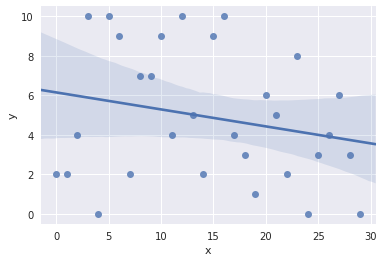

In [34]:
## Lets  try to plot it.
ax = sns.regplot(x="x", y="y", data=PanData)
ax

In [37]:
# testing example: https://github.com/mattnedrich/GradientDescentExample/blob/master/gradient_descent_example.py
# need to modify to fit pandas...
# whats important is to determine what coefficents to be calculated!

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

# taking a numerical aproach to the gradient
# interesting: here he splits by variables...
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]



In [36]:
learnRate = 0.1
init_b = 0
init_m = 0
iterations = 1000